# K Means Clustering Algorithms Implementation

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=23)

In [4]:
X.shape

(1000, 2)

In [9]:
plt.scatter(X[:,0], X[:,1])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.cluster import KMeans

In [12]:
## Manual Process

## Elbow Method to select the K value

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    

c:\Users\arshn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\arshn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\arshn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\arshn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [13]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585607,
 1181.4952002962868,
 1004.4984021460966,
 857.2556260220226,
 769.3756439229165,
 668.8613278177296,
 577.6176523630063,
 545.8750962037244]

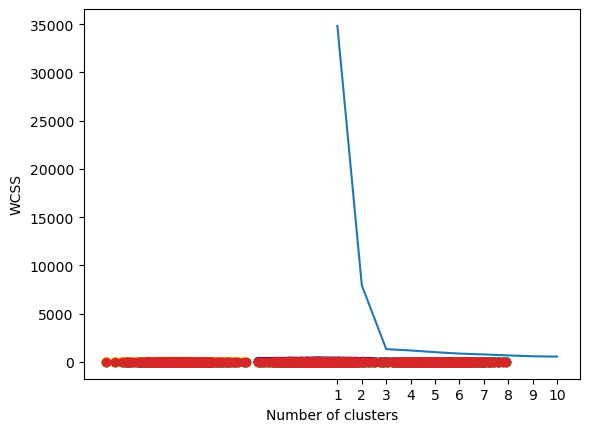

In [14]:
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [16]:
y_labels = kmeans.fit_predict(X_train)

c:\Users\arshn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [18]:
y_test_labels = kmeans.predict(X_test)

In [17]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_labels)

In [19]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_labels)

In [20]:
##Knee locator

In [21]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [22]:
from kneed import KneeLocator

In [24]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [25]:
## Performance metrics
## Silhoutte score

from sklearn.metrics import silhouette_score

In [26]:
silhouette_coefficients=[]

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

c:\Users\arshn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\arshn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\arshn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\arshn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [27]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6508312755107162,
 0.46874416045648987,
 0.3259236493459803,
 0.34915722018273676,
 0.3368306368325511,
 0.32280147089183764,
 0.34336748611788415]

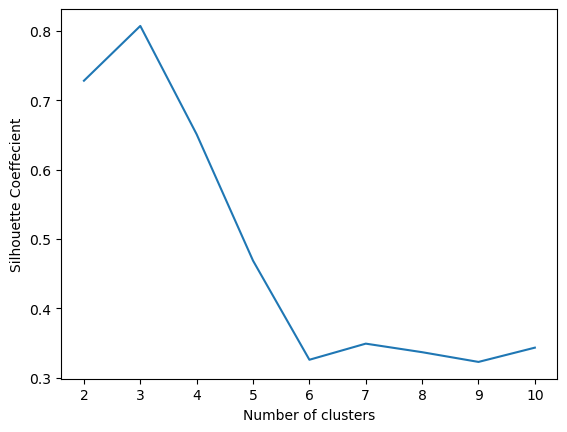

In [29]:
## Plotting silhouette score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coeffecient')
plt.show()